First-Last words:
This is the very first attemt at looking at the accumulated data. The goal here was to get a feel of how the whole thing behaves, what to expect. 
There are a few blocks that contain no meaninfgul information, but I kept the whole work without deleting any so that anyone can follow the whole thought process.

The 'preliminary analysis' will have a second notebook - more focused on connections between individual cards instead of characterizing whole sets -  before the matching & strategy building would start.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from glob2 import glob

In [34]:
set_names=pd.read_csv("editions.dat",sep=";", names=["URL", "set_name"])
#Load the file which contains the set names

Now I want to look at first how the individual prices (per set) behave vs. time, and then compare the behaviour of the sets. 

But first, I would like to see how many cards are we talking about per set, since... that might upset things.

It would be nice If I only had to load every csv once, so I will write a function that does all the stuff I need. 

This function needs to: 
    - Read the csv
    - write the number of cards (entries with unique names) kept in this set
    - Mode, median, and most expensive card(s) plotted for the set vs. time.
    
  To define 'the most expensive cards' I could take multiple approaches, ranging from "in every timestep use the actual most expensive" to "plot *all* cards that at any point is at the top" which would probably result in somewhere between 2-5 "top" lines for each set. My call was to plot the cards that has the 5 highest *mean* value for the whole time. This approach has a caveat that if a card loses (or gains) a lot of value during the period, that would not be featured even for the period when it did have the highest value. I would make efforts to avoid this should it be an issue around the end, but in the preliminary analysis I will allow such (low chance) issues to stay.

In [35]:

def prel_plotting(frame, name):# I could control here the top cards, or other things, but for now I will choose not to
    pseu_df=pd.read_csv(name+"_unified.csv")
    pseu_df.date=pseu_df.date.str[:-5].astype('datetime64[ns]')
    #Now remove the ones that on average are under 0.2$ - the previous condition was too 'soft'
    pseu_df=pseu_df[pseu_df.name.isin(pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False)[pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False).values>0.2].index
    )]
    plt.figure()
    plt.plot(pseu_df.groupby("date")["fair_price"].mean())#plot mean 
    plt.plot(pseu_df.groupby("date")["fair_price"].aggregate(pd.Series.median))# plot median
    top_5=pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False)[:5].index # gathering the 5 most expensive cards
    for i in top_5:
        plt.plot(pseu_df[pseu_df.name==i].groupby("date")["fair_price"].mean())
    plt.title(name)
    plt.ylabel("price ($)")
    plt.xlabel("date")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()
    # plot is prepared
    #number of cards can be returned
    #mode, median makes no sense after investigation - too few high cost card, and too many low cost for it to be meaningful.
    #I should start thinking on excluding all cards except the few really high value ones but that... I don't like to throw away that much data
    # unify the whole thing into a single dataframe, that is easier to handle
    frame=pd.concat([frame, pseu_df])
    return frame, len(pseu_df.name.unique())

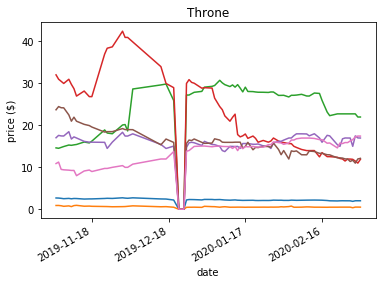

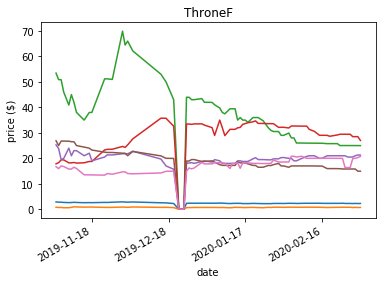

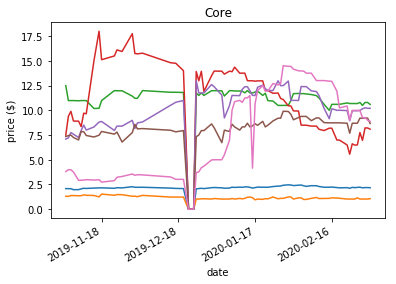

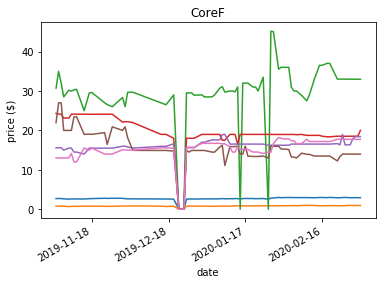

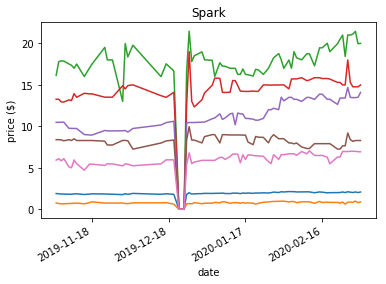

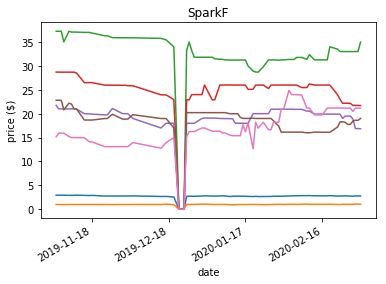

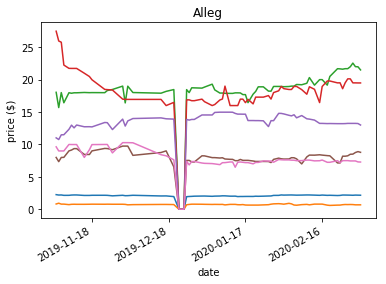

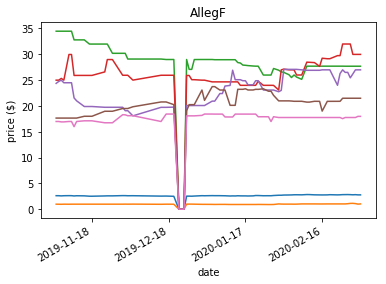

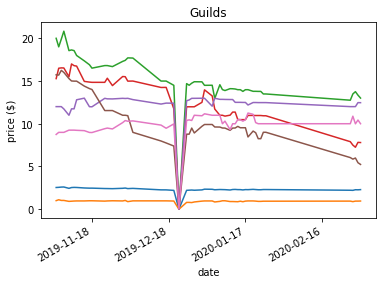

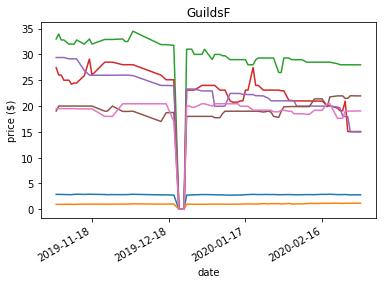

In [36]:
all_cards=pd.DataFrame()
for idx, row in set_names.iterrows():
    all_cards, set_names.loc[idx,"card_count"]=prel_plotting(all_cards, row["set_name"])
    

The cards on the top seem to be keeping their value in most cases, and there are small up- and down spikes in their price. Those are the ones we are looking for, I suspect those should be tournament results, or introduction of new cards interacting with their decks. Some cards seem to have trends in their prices as well, but they don't seem to be the same for sets. 

This seems to be good news on first sight (no "need" to correct for trends in sets, since no obvious trends) but without that obvious correction the correlation between card prices in same sets will always bring the question of whether it is the property of the deck they are featured in or the set they came in. 

Text(0.5, 1.0, 'Cards with average value over 0.2$ per set. ')

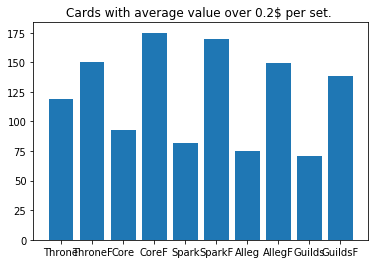

In [37]:
plt.bar(set_names["set_name"], set_names["card_count"])
plt.title("Cards with average value over 0.2$ per set. ")

Two points can be adressed immediately:
    - The amount of "useful" cards (let's just call them that) goes slightly down with going back in time (since Guilds - alleg - spark - core -throne is the order in which the sets came out). As more packs get opened, the market gets over-saturated, so they drop in value. 
        - There seems to be a discrepancy in the regular-foil ratio of the Throne set. While the number of 'regular' cards holding value seems to fit to the trend set by the others, the number of foils is very low in this instance. I could speculate for the reasons behind this, but it is likely that I will need to dive deeper for an explanation.  

In the next step there is some problem with the data right around the end of December. I shall find that and see what causes it around there.

I'll check which dates these are and then look into their CSV-s.

In [38]:
all_cards.groupby("date")["fair_price"].max()[all_cards.groupby("date")["fair_price"].max()==0]

date
2019-12-22    0.0
2019-12-24    0.0
Name: fair_price, dtype: float64

In [39]:
faulty=pd.read_csv("CSV/Alleg_2019-12-22_1211.csv")
faulty

,absoluteChangeSinceOneWeekAgo,absoluteChangeSinceYesterday,bestVendorBuylist,bestVendorBuylistPrice,cardId,color,countForTrade,fair_price,fullImageUrl,isFoil,lowestPrice,lowestPriceVendor,manna,name,percentageChangeSinceOneWeekAgo,quantity,rarity,setName,setUrl,url
0,-1.49,0,UNDEFINED,0,AbsorbRavnica_AllegiancefalseNM-M,Gld,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,WUU,Absorb,-100.0,0,R,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Absorb
1,-0.01,0,UNDEFINED,0,Act_of_TreasonRavnica_AllegiancefalseNM-M,R,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,2R,Act of Treason,-100.0,0,C,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Act_of_Treason
2,-0.01,0,UNDEFINED,0,AeromunculusRavnica_AllegiancefalseNM-M,Gld,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,1GU,Aeromunculus,-100.0,0,C,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Aeromunculus
3,-0.08,0,UNDEFINED,0,AmplifireRavnica_AllegiancefalseNM-M,R,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,2RR,Amplifire,-100.0,0,R,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Amplifire
4,-0.79,0,UNDEFINED,0,Angel_of_GraceRavnica_AllegiancefalseNM-M,W,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,3WW,Angel of Grace,-100.0,0,M,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Angel_of_Grace
5,-0.05,0,UNDEFINED,0,Angelic_ExaltationRavnica_AllegiancefalseNM-M,W,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,3W,Angelic Exaltation,-100.0,0,U,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Angelic_Exaltation
6,-0.01,0,UNDEFINED,0,Applied_BiomancyRavnica_AllegiancefalseNM-M,Gld,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,GU,Applied Biomancy,-100.0,0,C,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Applied_Biomancy
7,-0.08,0,UNDEFINED,0,Archway_AngelRavnica_AllegiancefalseNM-M,W,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,5W,Archway Angel,-100.0,0,U,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Archway_Angel
8,-0.02,0,UNDEFINED,0,Arrester's_AdmonitionRavnica_AllegiancefalseNM-M,U,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,2U,Arrester's Admonition,-100.0,0,C,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Arrester's_Admonition
9,-0.01,0,UNDEFINED,0,Arrester's_ZealRavnica_AllegiancefalseNM-M,W,0,0,http://s.mtgprice.com/sets/Ravnica_Allegiance/...,False,999999,Unknown,W,Arrester's Zeal,-100.0,0,C,Ravnica_Allegiance,/spoiler_lists/Ravnica_Allegiance,/sets/Ravnica_Allegiance/Arrester's_Zeal


So for whatever reason (probably the servers died and noone checked them during christmas?) the page itself had issues with the prices (as indicated by the "change since a week ago" columns. I have no other option but to discard these two. 

In [40]:
del faulty


In [41]:
all_cards=all_cards[~all_cards.date.isin( all_cards.groupby("date")["fair_price"].max()[all_cards.groupby("date")["fair_price"].max()==0].index ) ]
all_cards=all_cards.drop_duplicates(subset=["date", "name", "setName"])# I should've done this waay earlier - I need to specialize these three for consistency reasons.


Thats done. 
Now - just to get an idea - I try to see the correlations between card prices.
I will - for now - go ahead and assume that the non-foils are enough. 

So to do this, at first I'll need a new dataframe - the change since the last datapoint divided by the days since the last datapoint for each card. Now the tricky part is to decide whether to keep the values as \\$ dimension, or as a percentage. While both can be argued for, I will go for the \\$ at first. My reasoning is that when a low value (common/uncommon) card changes 0.5 \\$ in value, that is a significant change in percentage, but that is not somethin one would look for when talking about card prices. In contrast, a 10 \\$ card going to 8 is 20%, which is a huge game-changer. Basically this way the result will be more sensitive to the interaction between high value cards, and less to low values.

Then I can draw a correlation matrix.

One more thing: I could introduce new datapoints by interpolating between the neighbours, this would make the dataset "evenly spaced" but I think that would make more harm than good. I'll just leave it this way.

In [42]:
def derive(card_name, source, corr_mtx, foil=False):
    if card_name in ["Forest", "Island", "Swamp", "Mountain", "Plains"]:
        return corr_mtx
    pseu_mtx=source[(source.name==card_name)  ]# one card at a time
    pseu_mtx= pseu_mtx[pseu_mtx.setName.str[-4:]!="Foil"]#dont need the foils
    pseu_mtx=pseu_mtx.reset_index(drop=True)
    pseu_mtx=pseu_mtx.set_index("date", drop=False)
    if len(pseu_mtx.name)==0:
        return corr_mtx
    rolled=pseu_mtx.shift()# this is the "one day earlier" dataframe
    #corr_mtx=pd.DataFrame()

    corr_mtx[card_name]=pseu_mtx["fair_price"]
    return corr_mtx

Ok, so one issue seems to be that for example in Ravnica's case I have removed a bunch of "datapoints" with the condition that stated that I should remove every CSV that is 100% equal to the previous. This was introduced because the website updates the prices every day and I have set the script up to ask the prices twice a day (mainly because I couldn't pinpoint a time when my computer would be 100% sure to be turned on & online.

This is fortunately an easy fix - I will just assign the 'date' to be the index column in the pseu matrices (already done above). Once that is done, for every NaN I can go ahead and sub in the last non-NaN value. 

In [43]:
corr_mtx=pd.DataFrame()
for cardname in all_cards.name.unique():
    corr_mtx=derive(cardname, all_cards, corr_mtx)

prev_row=(corr_mtx.loc[[corr_mtx.index[0]]]).iloc[0]
for idx, row in corr_mtx.iterrows():
    row.fillna(prev_row)
    prev_row=row.copy()

In [44]:
corr_mtx

,Acclaimed Contender,"Alela, Artful Provocateur",All That Glitters,Arcane Signet,Ardenvale Tactician,"Ayara, First of Locthwain",Banish into Fable,Blacklance Paragon,Bonecrusher Giant,Bramblefort Fink,...,Thief of Sanity,Thought Erasure,Thousand-Year Storm,Trostani Discordant,Underrealm Lich,Unmoored Ego,Venerated Loxodon,Vraska's Stoneglare,"Vraska, Golgari Queen",Watery Grave
date,,,,,,,,,,,,,,,,,,,,,
2019-11-04,0.39,7.92,0.18,7.99,0.16,1.48,1.03,0.59,2.42,0.09,...,1.95,1.46,3.79,2.26,1.82,1.07,0.88,0.10,15.30,10.69
2019-11-05,0.40,7.00,0.20,9.25,0.16,1.51,0.35,0.59,2.42,0.09,...,1.90,1.50,3.78,2.25,1.82,1.11,0.89,0.09,16.49,11.02
2019-11-06,0.31,6.99,0.20,8.58,0.16,1.25,0.32,0.45,2.43,0.09,...,1.89,1.50,3.77,2.25,1.82,1.11,0.84,0.08,16.53,11.02
2019-11-07,0.13,7.50,0.20,9.45,0.16,1.25,0.50,0.15,2.43,0.10,...,1.94,1.50,3.77,2.24,1.81,1.11,0.90,0.08,16.52,11.00
2019-11-09,0.28,7.43,0.19,7.99,0.16,1.42,0.56,0.55,2.44,0.09,...,1.73,1.50,3.50,1.75,1.73,1.10,0.92,0.12,15.49,11.00
2019-11-10,0.27,7.43,0.20,9.43,0.16,1.41,0.35,0.28,2.45,0.09,...,1.76,1.50,3.50,2.17,1.84,1.09,0.94,0.12,16.99,11.40
2019-11-11,0.25,7.38,0.20,9.21,0.16,1.41,0.56,0.36,2.43,0.87,...,1.86,1.50,3.50,2.18,1.84,1.09,0.94,0.12,16.79,11.45
2019-11-12,0.35,7.10,0.20,9.19,0.16,1.42,1.03,0.56,2.43,0.87,...,1.89,1.31,3.49,2.17,1.62,1.11,0.95,0.12,16.74,11.45
2019-11-15,0.39,6.94,0.21,7.69,0.16,1.38,0.55,0.56,2.32,0.87,...,1.79,1.27,3.49,1.45,1.79,1.11,0.95,0.12,14.95,11.47


Finally, remove the first row (since it is full of NaN-s), swap all remaining NaN-s for zeros (I expect NaN-s to be present in the case of Ravnica, where the prices didn't change, or if the edition didn't exist in that time. This latter might need special treatment), and I have the basis for my correlation matrix. 

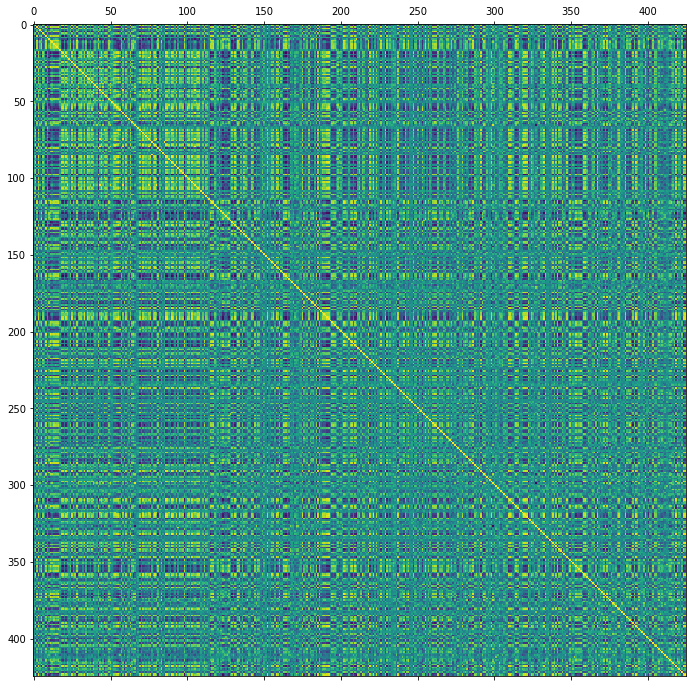

In [46]:
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(corr_mtx.corr()) #The replace is because the mathshow uses the limits to determine the colors, and a 1.0 correlation would skew the colormap.


So... From this, obviously not much can be deducted immediately, but some info is already visible: 
At least two correlating "blocks" can be easily identified. The existence of these 'blocks' can be explained easily: They should be the editions (thus, the correlations that were not immediately clear in the graphs, can still exist) 

A new plot can easily show if this is the case.

In [47]:
borders=all_cards[all_cards.setName.str[-4:]!="Foil"].sort_values("name").drop_duplicates("name").setName.value_counts().values

(0, 425)

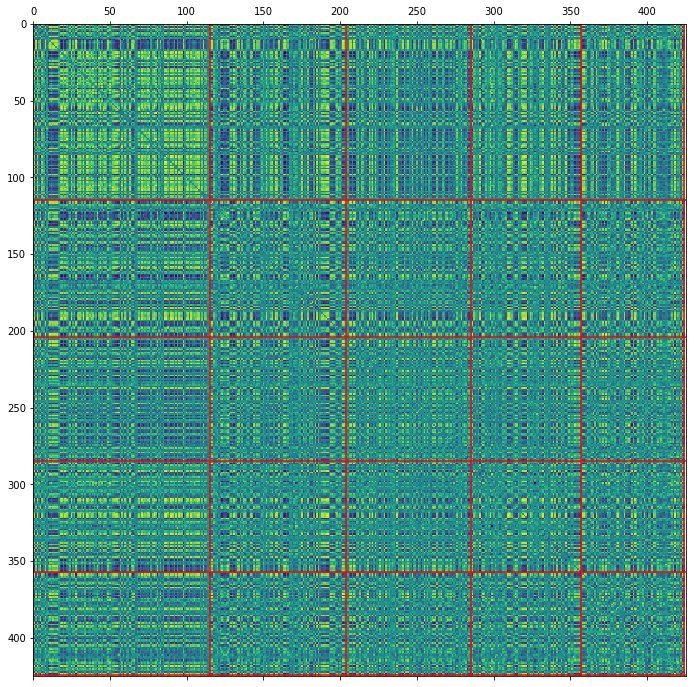

In [48]:
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(corr_mtx.corr().replace(1,0)) #The replace is because the mathshow uses the limits to determine the colors, and a 1.0 correlation would skew the colormap.
border=0
for i in borders:
    border+=i-1
    ax.plot([0,425],[border, border],"r-",)
    ax.plot([border, border],[0,425], "r-",)
ax.set_ylim(425,0)
ax.set_xlim(0,425)

Now this is very interesting. 

Most sets seem to be homogenous in a sense that there are a few spots in the plot in every tile, but Ravnica & Throne seems to have huge trends of correlating cards. 

This can be just coincidence (ie. Guilds of ravnica falling in value for whatever reason while Throne falling in value because it is a relatively new edition - and an even newer came just around the time relevant here) or direct causation (they might represent similar and/or complementary cards in fucntion, so one getting weaker/stronger can result in a spike in usage of these)  



In [49]:
index_map=all_cards[all_cards.setName.str[-4:]!="Foil"][["setName", "name"]].drop_duplicates("name")
index_map=index_map[~index_map.name.isin(["Forest", "Island", "Swamp", "Mountain", "Plains"])]
corr_mtx.columns=pd.MultiIndex.from_frame(index_map)
corr_mtx

setName     Throne_of_Eldraine                                              \
name       Acclaimed Contender Alela, Artful Provocateur All That Glitters   
date                                                                         
2019-11-04                0.39                      7.92              0.18   
2019-11-05                0.40                      7.00              0.20   
2019-11-06                0.31                      6.99              0.20   
2019-11-07                0.13                      7.50              0.20   
2019-11-09                0.28                      7.43              0.19   
2019-11-10                0.27                      7.43              0.20   
2019-11-11                0.25                      7.38              0.20   
2019-11-12                0.35                      7.10              0.20   
2019-11-15                0.39                      6.94              0.21   
2019-11-17                0.40                      6.94              0.20   
2019-11-18                0.35                      6.94              0.24   
2019-11-23                0.28                      5.89              0.22   
2019-11-24                0.27                      5.89              0.21   
2019-11-26                0.27                      5.11              0.21   
2019-11-30                0.30                      5.98              0.17   
2019-12-01                0.25                      6.40              0.17   
2019-12-02                0.24                      5.86              0.16   
2019-12-04                0.33                      6.76              0.19   
2019-12-15                0.27                      5.20              0.16   
2019-12-17                0.29                      5.48              0.16   
2019-12-20                0.30                      6.00              0.13   
2019-12-25                0.20                      5.87              0.23   
2019-12-26                0.28                      5.87              0.89   
2019-12-27                0.28                      5.87              0.24   
2019-12-28                0.25                      5.66              0.24   
2019-12-31                0.19                      4.99              0.25   
2020-01-01                0.24                      4.78              0.24   
2020-01-04                0.35                      4.57              0.25   
2020-01-05                0.20                      4.55              0.25   
2020-01-07                0.35                      4.55              0.25   
...                        ...                       ...               ...   
2020-01-22                0.28                      4.74              0.35   
2020-01-24                0.28                      4.51              0.35   
2020-01-26                0.27                      4.52              0.35   
2020-01-27                0.27                      4.52              0.42   
2020-01-28                0.27                      4.52              0.45   
2020-01-30                0.27                      4.52              0.57   
2020-01-31                0.27                      4.47              0.59   
2020-02-01                0.27                      4.47              0.69   
2020-02-03                0.27                      4.43              0.74   
2020-02-04                0.27                      4.43              0.75   
2020-02-05                0.27                      4.38              0.35   
2020-02-06                0.27                      4.43              0.35   
2020-02-08                0.27                      4.32              0.89   
2020-02-10                0.26                      4.00              0.78   
2020-02-11                0.26                      3.30              0.78   
2020-02-13                0.26                      2.98              0.78   
2020-02-15                0.17                      3.76              0.69   
2020-02-16            

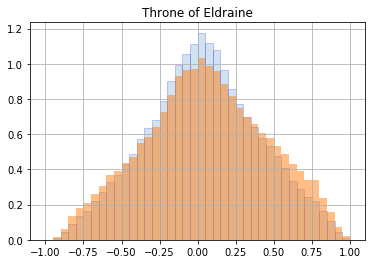

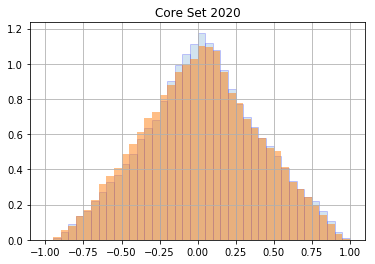

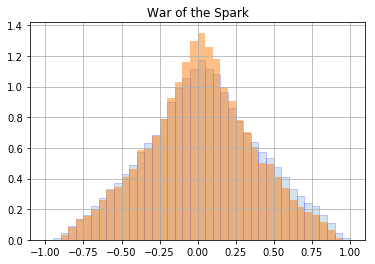

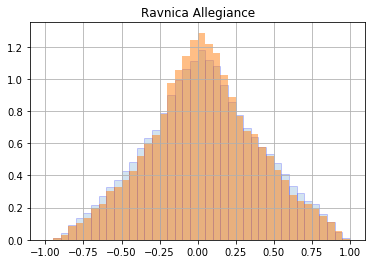

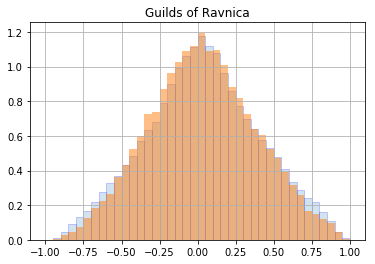

In [50]:
for edit in corr_mtx.corr().columns.get_level_values(0).unique():
    plt.figure()
    corr_mtx.corr().replace(1,0).stack().stack().hist( bins=40, range=[-1,1], density=True, alpha=.2, edgecolor="b")
    corr_mtx.corr()[edit].replace(1,0).stack().hist( bins=40, range=[-1,1], density=True,  alpha=.5)
    plt.title(edit.replace("_"," "))






The general shape  - unsuprisingly - looks very much like a gaussian distribution at first, but it seems to be a bit skewed towards the positive side. 

THis is easily explained through the original assumption of the trends - namely, that cards tend to lose value with time and thus, this negative trend causes a small bias which causes cards to be more inclined to have a slight correlation.

I'll look at the correlations between sets, to see if there is any feature that might be interesting to investigate further.

In [51]:
full_matrix=corr_mtx.corr()
list_used=corr_mtx.corr().columns.get_level_values(0).unique()

<Figure size 432x288 with 0 Axes>

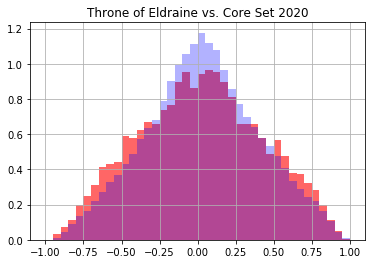

<Figure size 432x288 with 0 Axes>

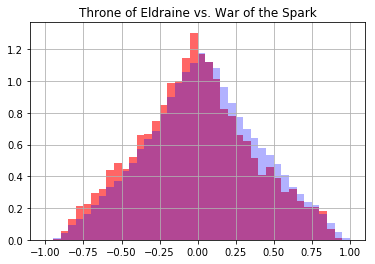

<Figure size 432x288 with 0 Axes>

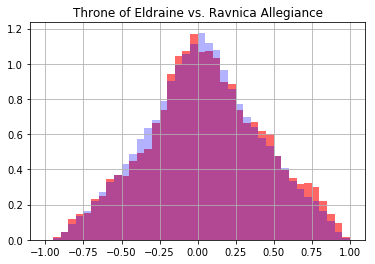

<Figure size 432x288 with 0 Axes>

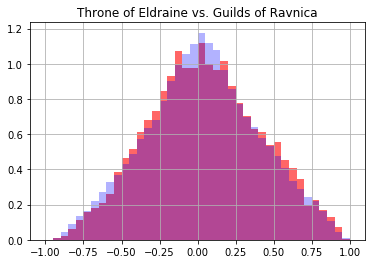

<Figure size 432x288 with 0 Axes>

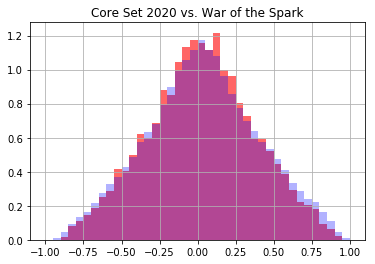

<Figure size 432x288 with 0 Axes>

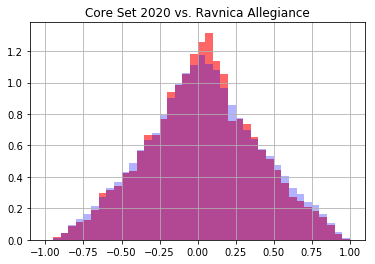

<Figure size 432x288 with 0 Axes>

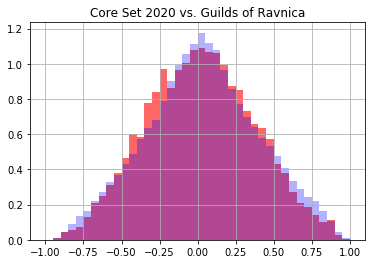

<Figure size 432x288 with 0 Axes>

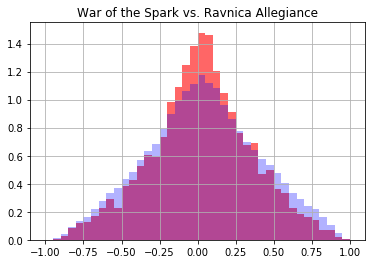

<Figure size 432x288 with 0 Axes>

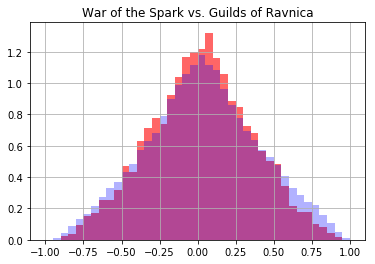

<Figure size 432x288 with 0 Axes>

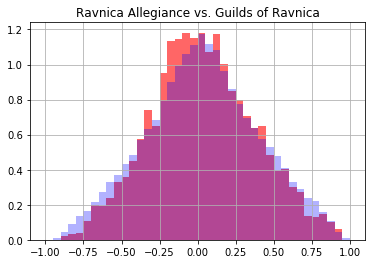

In [52]:
for i in range(len(list_used)):
    for j in range(i+1, len(list_used)):# since now we need two items from the list, I'll use I and J as indexes
        plt.figure()
        full_matrix.loc[[list_used[i]], [list_used[j]]].replace(1,0).stack().hist( bins=40, range=[-1,1], density=True,  alpha=.6, color="r")
        corr_mtx.corr().replace(1,0).stack().stack().hist( bins=40, range=[-1,1], density=True, alpha=.3, color="b")
        plt.title(list_used[i].replace("_"," ")+ " vs. "  +list_used[j].replace("_"," "))


I like these plots since every color stands out massively. 
Orange: The title is over-represented in that bin
Blue: the title is under-represented in the bin
Magenta: neither over-, nor underrepresented. 

The plot could be re-made in a way to color every whole bin in accordance with the top color for better visualization, but for me this is good enough for now. 

Edit: I kind of thought of a better representation, below: This shows even more clearly the relation between sets. 


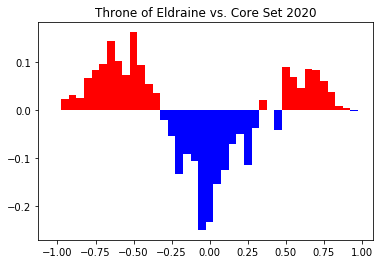

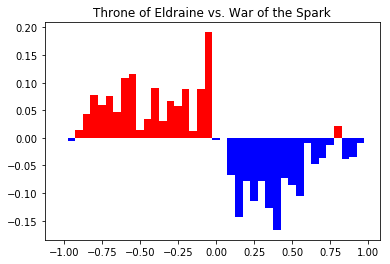

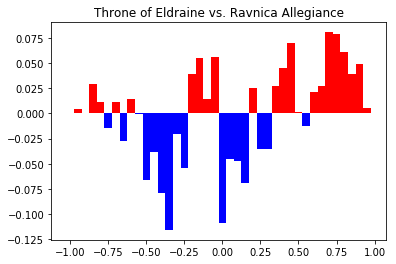

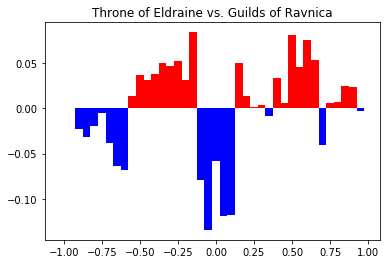

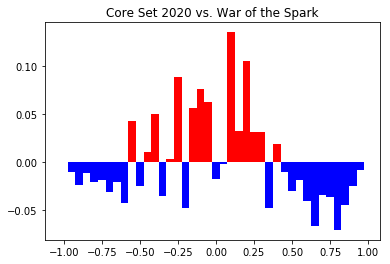

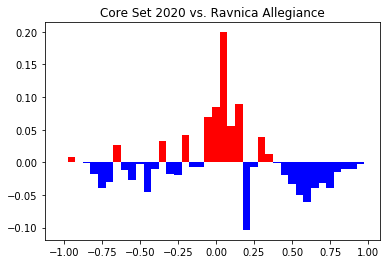

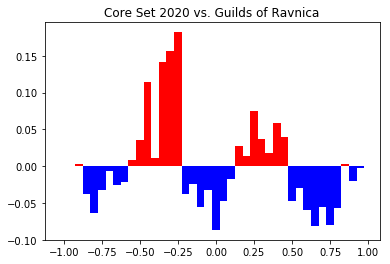

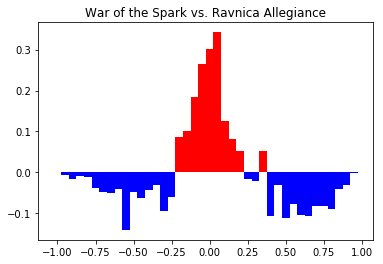

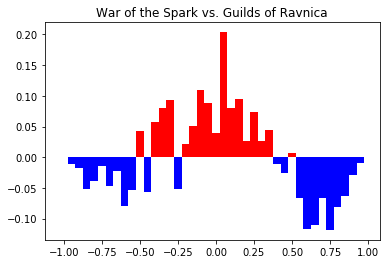

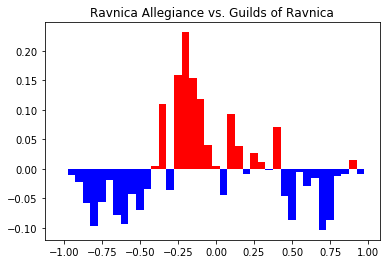

In [53]:
b=np.histogram(corr_mtx.corr().replace(1,0).stack().stack(), density=True, bins=40, range=[-1,1])[1]
for i in range(len(list_used)):
    for j in range(i+1, len(list_used)):# since now we need two items from the list, I'll use I and J as indexes
        plt.figure()
        a=np.histogram(full_matrix.loc[[list_used[i]], [list_used[j]]].replace(1,0).stack(), density=True, bins=40,  range=[-1,1])[0]-np.histogram(corr_mtx.corr().replace(1,0).stack().stack(), density=True, bins=40, range=[-1,1])[0]
        plt.bar(b[1:]-(b[1]-b[0]), a, width=b[0]-b[1], color=np.where(a>0,"r", "b"))    
        plt.title(list_used[i].replace("_"," ")+ " vs. "  +list_used[j].replace("_"," "))


        

*Throne of Eldraine*

So from this it can be said that the cards of Throne vs. the Core Set seems to be more likely to anti-correlate, while in other cases the cards of throne seems to have no connection to other cards (the no correlation part is over-represented). The exception is the Guilds of Ravnica, where it seems that the correlating and anti-correlating cards are both over-represented. This would mean that either 
  -  a) the meta favoured by Throne and Ravnica more or less "moves" on the same angle, which means that they feature cards and counter-cards intended for similar situations. This could be proven or disproven by looking at the nature of the cards.
  -  b) Some selection bias have been introduced when the minimum price limit was introduced for the cards. This would mean that the cards that have "randomly changing value" tend to lose value faster than the ones that change their values with the meta. This is a plausible explanation, and can be proven or disproven through looking at the Ravnica vs. the other editions.
  -  c) The significantly less datapoints for Ravnica (there are a bunch of "no changes" coming from the fact that Ravnica is the oldest edition) could skew the analysis.
  
*Core set*

A core set is - and always will be - special in a sense that its life expectancy is the shortest. It shows a similar over-representation in anticorrelating cards with GoR as it has shown with ToE. This is interesting in the light of the fact that those two sets seem to have the tendencies described above. 

In other cases the core set seems to show something that can be interpreted as a wider spread in the middle. This is plausible, since the core set is made to "adjust" to the expected meta defined by the thematic blocks, so it shouldn't be a surprise that these cards do show small (anti-)correlations with cards of other sets, and are less likely to be completely independent.

*War of the spark*

WotS shows the complete opposite: it seems to have a whole lot of 'independent' cards. With a big bunch of planeswalkers (and cards working with/around planeswalkers) this is probably not that surprising. These cards don't tend to change value that much - at least I would not expect them to. It can be seen above that WotS cards also have slightly higher correlations among themselves on average which supports this theory.

*Ravnica*

RA seems to have a similar pattern - independent cards - , except it seems to have a slight anti-correlation with "itself". I can't come up with an explanation for this right off the bat, it would need further investigation.

The ravnica block tends to have a higher representation of "independent" cards, which makes the relation of GoR - ToE even more intriguing.

Two things remain before concluding this first part of the exploration:
   - Looking at the basic lands (they were excluded above), but that should be a really short bit
   - Trying a very basic approximation to see if the cards can be clustered based on the correlation matrix.

In [54]:
lands=all_cards[all_cards.name.isin(["Forest", "Island", "Swamp", "Mountain", "Plains"])]
lands["isFoil"]=np.where(lands.setName.str[-4:]=="Foil", True, False) 
lands

c:\users\domenyb\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,bestVendorBuylist,bestVendorBuylistPrice,countForTrade,date,fair_price,lowestPrice,lowestPriceVendor,name,quantity,setName,isFoil
69,UNDEFINED,0.00,0,2019-11-04,0.20,0.15,Card Kingdom,Forest,0,Throne_of_Eldraine,False
99,UNDEFINED,0.00,0,2019-11-04,0.47,0.15,Card Kingdom,Island,0,Throne_of_Eldraine,False
121,UNDEFINED,0.00,0,2019-11-04,0.20,0.15,Card Kingdom,Mountain,0,Throne_of_Eldraine,False
188,UNDEFINED,0.00,0,2019-11-04,0.20,0.15,Card Kingdom,Swamp,0,Throne_of_Eldraine,False
527,UNDEFINED,0.00,0,2019-11-05,0.20,0.15,Card Kingdom,Forest,0,Throne_of_Eldraine,False
557,UNDEFINED,0.00,0,2019-11-05,0.46,0.15,Card Kingdom,Island,0,Throne_of_Eldraine,False
579,UNDEFINED,0.00,0,2019-11-05,0.20,0.15,Card Kingdom,Mountain,0,Throne_of_Eldraine,False
646,UNDEFINED,0.00,0,2019-11-05,0.20,0.15,Card Kingdom,Swamp,0,Throne_of_Eldraine,False
756,UNDEFINED,0.00,0,2019-11-06,0.20,0.15,Card Kingdom,Forest,0,Throne_of_Eldraine,False
786,UNDEFINED,0.00,0,2019-11-06,0.25,0.15,Card Kingdom,Island,0,Throne_of_Eldraine,False


In [55]:
color_code={"Island":"b",
            "Swamp" :"k",
            "Mountain" :"r",
            "Plains" : "y",
            "Forest": "g"
    }#Setting a color code for the plotting of the cards

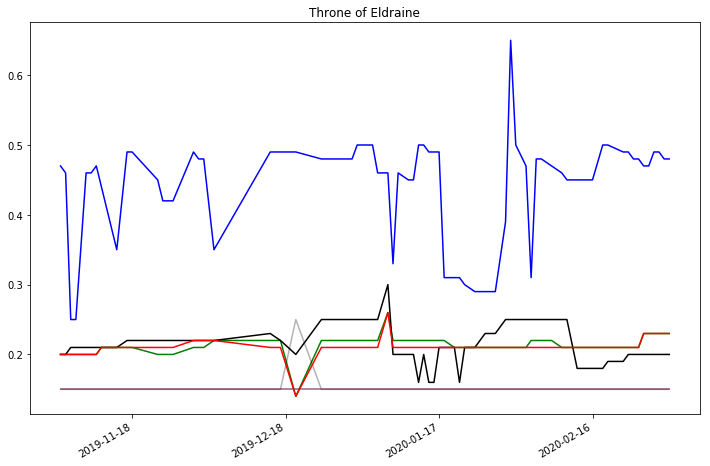

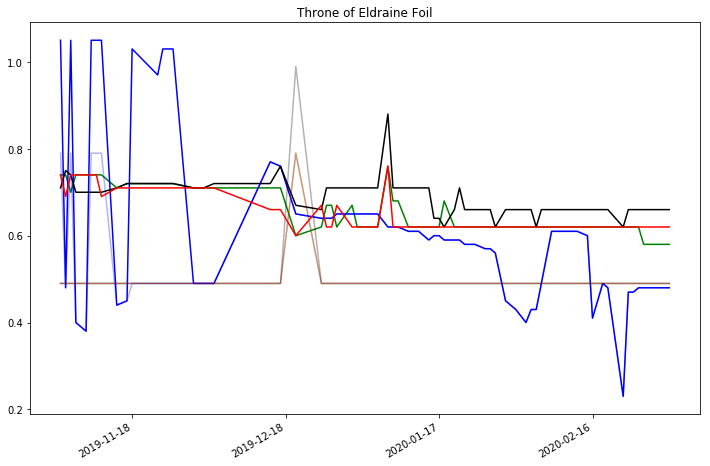

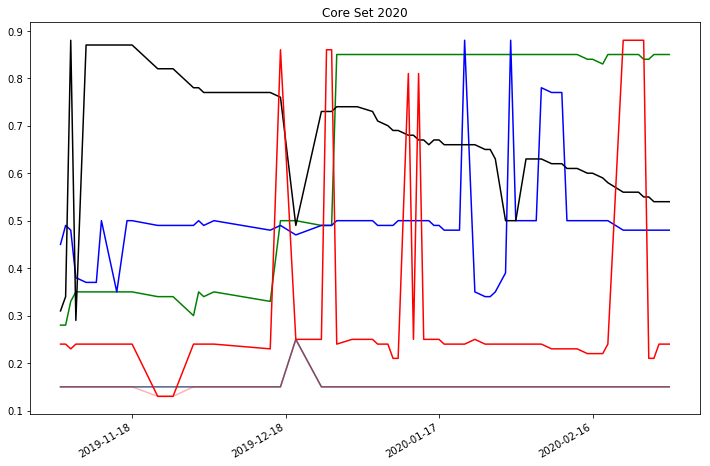

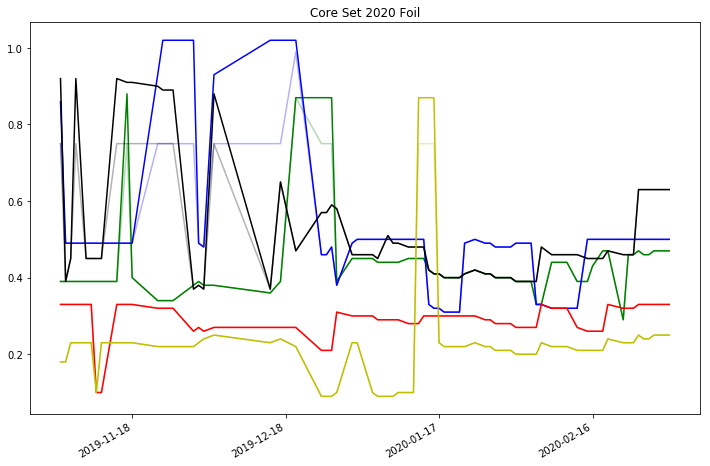

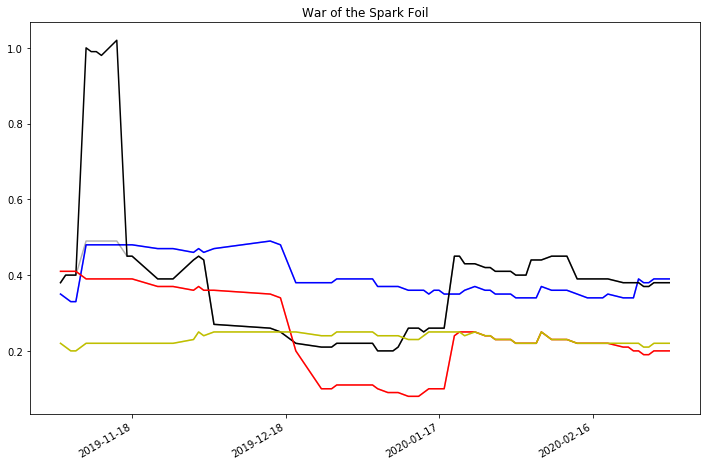

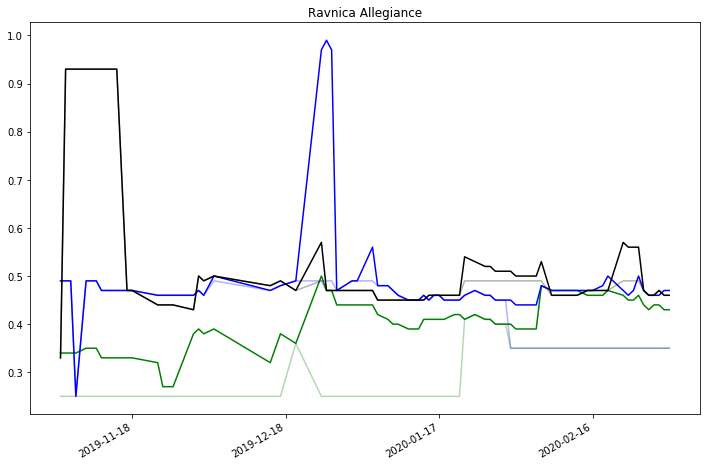

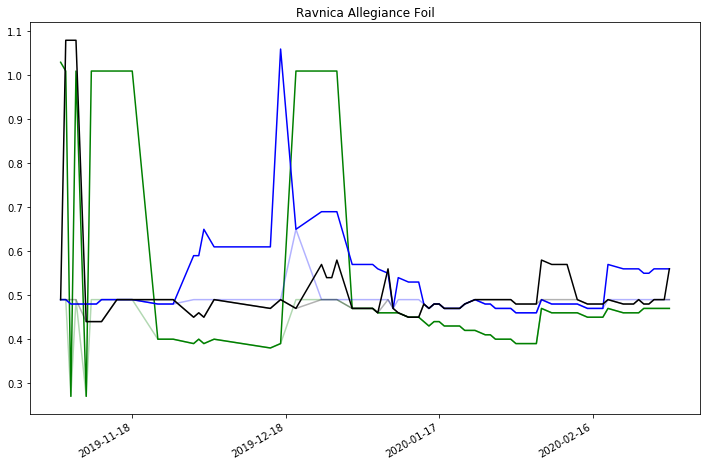

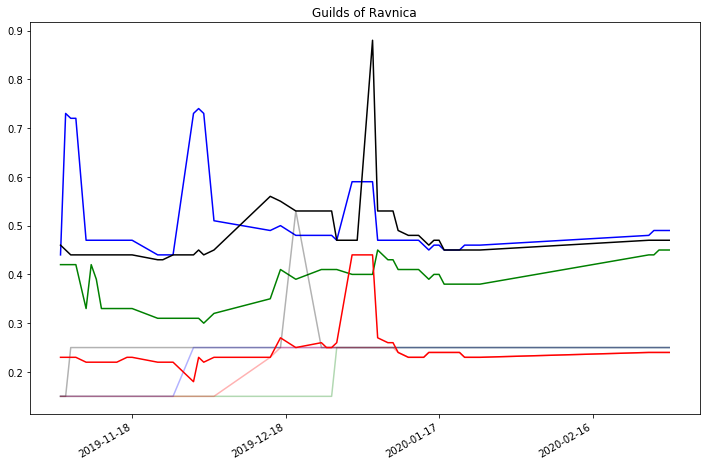

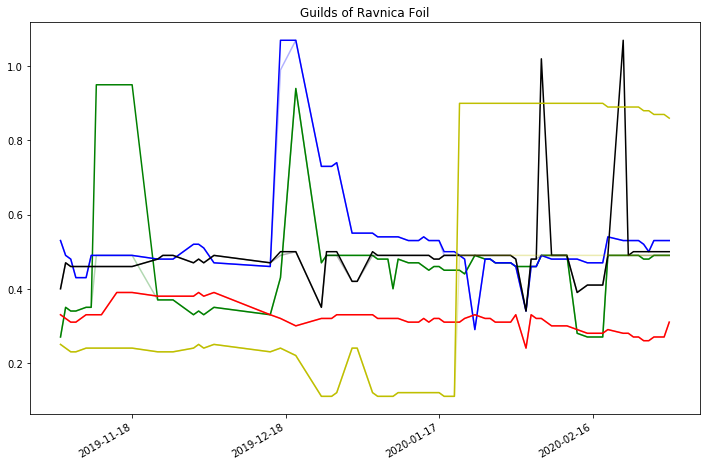

In [56]:
for edition in lands.setName.unique():
    plt.figure(figsize=(12,8)) # just my preference
    for land in ["Forest", "Island", "Swamp", "Mountain", "Plains"]:
        pseu=lands[lands.setName==edition]
        pseu=pseu[pseu.name==land]        
        plt.plot(pseu.date, pseu.fair_price, color_code[land]+"-")
        plt.plot(pseu.date, pseu.lowestPrice, color_code[land]+"-", alpha=.3)# included out of curiosity after seeing the strange behaviour of cards. Didn't help much though.
        plt.title(edition.replace("_", " "))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
        plt.gcf().autofmt_xdate()

So basic lands tend to behave quite randomly in the 0-1 \\$ interval. The randomness is even stranger if one includes that there seems to be no connection between the lands and their foil counterparts whatsoever. 

The "jumps" could be investigated, but since even those are not uniform between editions, it would be hard to explain or tie them to events. I'll ust accept that for some reason basic land prices tend to be random. It's not like anyone in their right mind would try to earn money through the prices of basic lands, so no information is lost here.

Lastly, I will just try to use a hierarchical clustering (by SciPy) to round the similar cards together.

In [57]:
import scipy.cluster.hierarchy as sch # import scipy

In [58]:
distances=sch.distance.pdist(corr_mtx.corr().values)# calculate all the distances

In [59]:

sch.fcluster(sch.linkage(distances, method='complete'), distances.max()/2, 'distance')#this cell does nothing, I was just curious of the output


array([1, 1, 2, 1, 5, 2, 1, 1, 2, 3, 2, 2, 5, 2, 2, 2, 2, 5, 1, 1, 4, 1,
       1, 4, 5, 1, 5, 1, 2, 1, 1, 1, 4, 1, 5, 1, 1, 4, 1, 1, 5, 4, 2, 1,
       1, 4, 1, 1, 1, 5, 4, 4, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 5, 2,
       5, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 5, 1, 2, 1, 1,
       1, 3, 1, 1, 4, 1, 3, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 5, 1, 1, 3, 2, 2, 2, 1, 3, 5, 3, 5, 2, 2, 2, 2, 2, 4, 1, 3, 1,
       1, 2, 2, 1, 5, 1, 1, 4, 2, 2, 1, 1, 2, 3, 5, 5, 3, 1, 5, 3, 1, 3,
       3, 1, 1, 3, 1, 1, 5, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 5, 1,
       2, 3, 5, 1, 2, 2, 2, 1, 2, 1, 5, 1, 1, 1, 1, 1, 1, 3, 2, 5, 2, 3,
       1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 4, 1, 2, 1, 1, 3, 3, 2, 1,
       1, 1, 3, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 3, 5, 4, 3, 1, 2, 2, 2, 2,
       1, 5, 2, 3, 3, 1, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 4, 3, 2, 2, 2, 1,
       5, 2, 2, 4, 1, 2, 2, 3, 5, 3, 5, 3, 1, 3, 3, 1, 2, 2, 5, 3, 2, 2,
       2, 1, 4, 3, 3, 1, 2, 5, 5, 1, 3, 3, 1, 5, 4,

In [60]:
recl=sch.fcluster(sch.linkage(distances, method='complete'), distances.max()/2, 'distance')# the above cell, this time the output is saved

columns = [corr_mtx.corr().columns.tolist()[i] for i in list((np.argsort(recl)))]#renaming, all that jazz for plotting
recl_corr = corr_mtx.reindex(columns, axis=1)


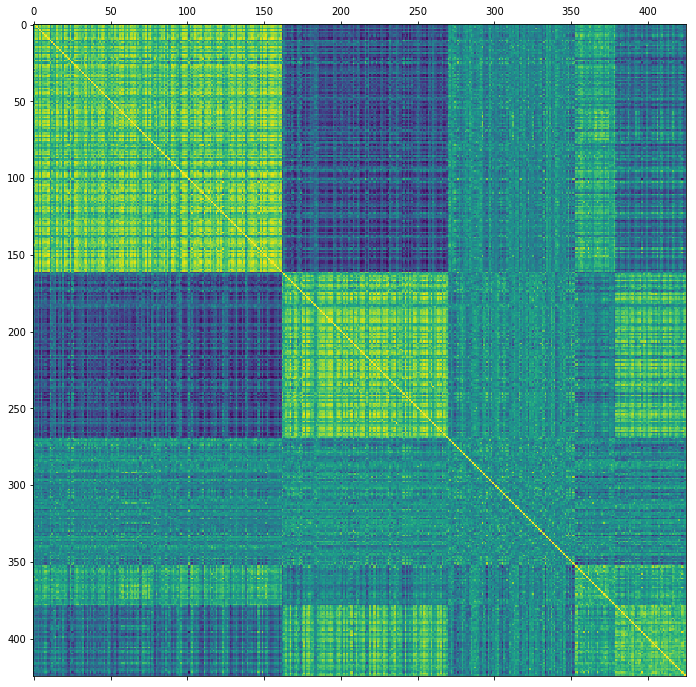

In [62]:
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(recl_corr.corr()) #The replace is no longer needed


So.. tthere seem to be 5 clusters, with at least two of them being "megaclusters" which contain many cards and I think could probably be refined to even more, smaller clusters. I will probably try to do so later in another notebook - once I have an idea about the behaviour of the data and about what "exactly" is worth paying attention to